In [ ]:
#TIỀN XỬ LÝ & CHIA DỮ LIỆU (train / val / test)
# import os, shutil, cv2, random
# from sklearn.model_selection import train_test_split

# source_path = "Dataset_Waste_Class/Waste Classification Dataset/waste_dataset"
# output_path = "Dataset_cnn"
# img_size = (225, 264)

# for folder in ['train', 'val', 'test']:
#     for label in ['organic', 'recyclable']:
#         os.makedirs(os.path.join(output_path, folder, label), exist_ok=True)

# for label in ['organic', 'recyclable']:
#     label_path = os.path.join(source_path, label)
#     images = os.listdir(label_path)
#     random.shuffle(images)

#     train_imgs, temp = train_test_split(images, test_size=0.4)
#     val_imgs, test_imgs = train_test_split(temp, test_size=0.5)

#     for img_name in train_imgs:
#         img = cv2.imread(os.path.join(label_path, img_name))
#         if img is None: continue
#         img = cv2.resize(img, img_size)
#         cv2.imwrite(os.path.join(output_path, 'train', label, img_name), img)

#     for img_name in val_imgs:
#         img = cv2.imread(os.path.join(label_path, img_name))
#         if img is None: continue
#         img = cv2.resize(img, img_size)
#         cv2.imwrite(os.path.join(output_path, 'val', label, img_name), img)

#     for img_name in test_imgs:
#         img = cv2.imread(os.path.join(label_path, img_name))
#         if img is None: continue
#         img = cv2.resize(img, img_size)
#         cv2.imwrite(os.path.join(output_path, 'test', label, img_name), img)

In [2]:
import os
import shutil
import cv2
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam

In [ ]:
input_shape = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen = datagen.flow_from_directory(
    os.path.join("Dataset_cnn/train"),
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    os.path.join("Dataset_cnn/val"),
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    os.path.join("Dataset_cnn/test"),
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 14823 images belonging to 2 classes.
Found 4941 images belonging to 2 classes.
Found 4941 images belonging to 2 classes.


In [ ]:
def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = build_cnn_model((128, 128, 3))

start = time.time()
history = model.fit(train_gen, validation_data=val_gen, epochs=10)
end = time.time()

print(f"Thời gian huấn luyện: {(end - start):.2f} giây")

Epoch 1/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 140s 299ms/step - accuracy: 0.7799 - loss: 0.5761 - val_accuracy: 0.7658 - val_loss: 0.5431
Epoch 2/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 138s 297ms/step - accuracy: 0.8220 - loss: 0.4075 - val_accuracy: 0.8195 - val_loss: 0.4135
Epoch 3/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 138s 297ms/step - accuracy: 0.8275 - loss: 0.4005 - val_accuracy: 0.8357 - val_loss: 0.3713
Epoch 4/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 139s 299ms/step - accuracy: 0.8382 - loss: 0.3759 - val_accuracy: 0.8389 - val_loss: 0.3678
Epoch 5/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 138s 296ms/step - accuracy: 0.8459 - loss: 0.3655 - val_accuracy: 0.8425 - val_loss: 0.3582
Epoch 6/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 137s 296ms/step - accuracy: 0.8497 - loss: 0.3572 - val_accuracy: 0.8446 - val_loss: 0.3720
Epoch 7/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 138s 297ms/step - accuracy: 0.8502 - loss: 0.3505 - val_accuracy: 0.8549 - val_loss: 0.3394
Epoch 8/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 138s 297ms/step - accuracy: 0.8594 -

In [ ]:
# Đánh giá
loss, acc = model.evaluate(test_gen)
print(f"Test Accuracy: {acc*100:.2f}%")

# Lưu mô hình
model.save("waste_cnn_model.h5")
print("Mô hình đã được lưu.")

155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.8900 - loss: 0.2879


Test Accuracy: 85.39%
💾 Mô hình đã được lưu.


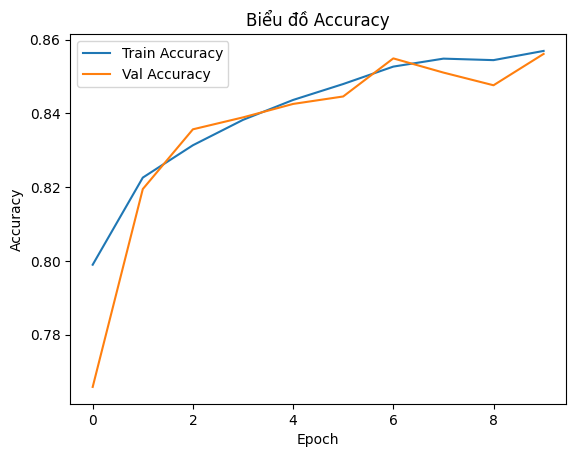

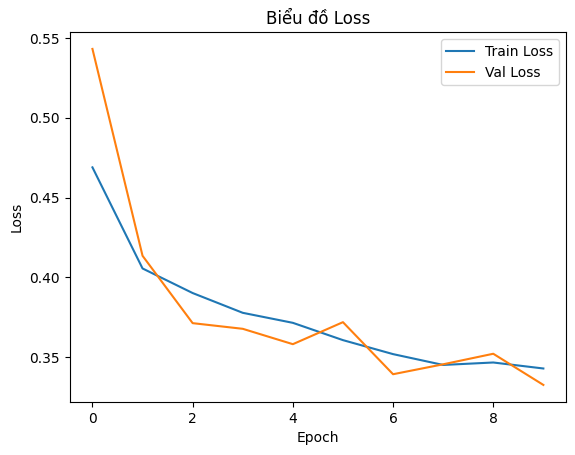

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Biểu đồ Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Biểu đồ Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


155/155 ━━━━━━━━━━━━━━━━━━━━ 31s 199ms/step


<Figure size 600x600 with 0 Axes>

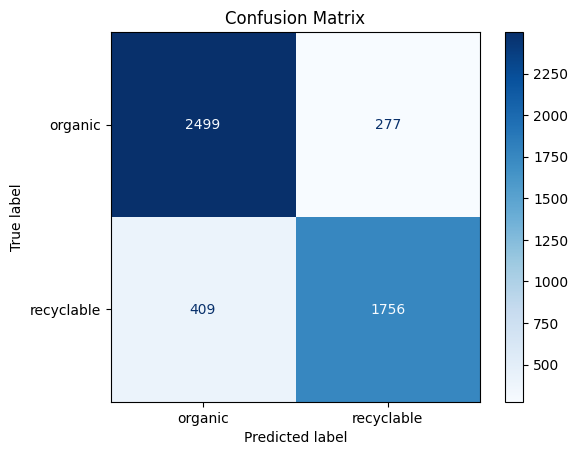

🔍 Classification Report:
              precision    recall  f1-score   support

     organic       0.86      0.90      0.88      2776
  recyclable       0.86      0.81      0.84      2165

    accuracy                           0.86      4941
   macro avg       0.86      0.86      0.86      4941
weighted avg       0.86      0.86      0.86      4941

✅ Accuracy : 86.12%
✅ Precision: 86.13%
✅ Recall   : 86.12%
✅ F1-score : 86.06%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score

labels = ['organic', 'recyclable']

# Dự đoán trên tập test
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# Vẽ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Tính các chỉ số
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

print(f"Accuracy : {acc*100:.2f}%")
print(f"Precision: {prec*100:.2f}%")
print(f"Recall   : {rec*100:.2f}%")
print(f"F1-score : {f1*100:.2f}%")


In [ ]:
# Load model
model = load_model("waste_classifier_cnn_model.h5")
labels = ['organic', 'recyclable']

input_shape = (128, 128)

def predict_image(img_path):
    # Load và xử lý ảnh
    img = image.load_img(img_path, target_size=input_shape)
    img_array = image.img_to_array(img) / 255.0
    img_batch = np.expand_dims(img_array, axis=0)

    # Dự đoán
    prediction = model.predict(img_batch)
    predicted_label = labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Hiển thị ảnh và kết quả
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f'Dự đoán: {predicted_label} ({confidence*100:.2f}%)', fontsize=14)
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


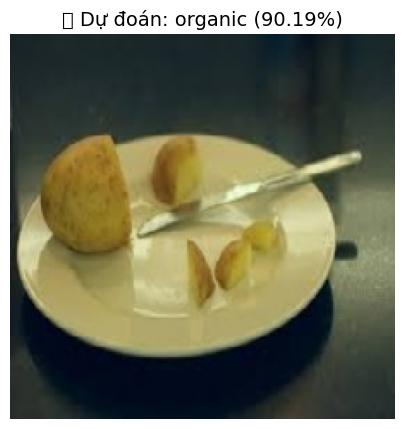

In [ ]:
predict_image("Dataset_cnn/test/organic/organic_000033_photo.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


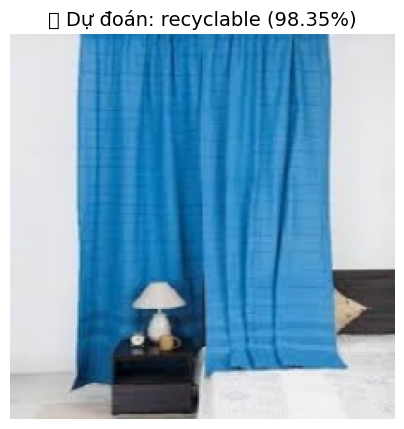

In [ ]:
predict_image("Dataset_cnn/test/recyclable/recyclable_000095_photo.jpg")
